# Stack Overflow Survey 2021

## Questions
1. What do people do when they get stuck on a prolem ?
2. What is the language you want to work with most ?
3. What is the best age to start learning coding ?

## 0. Pre-check data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('data/survey_results_public.csv')
schema = pd.read_csv('data/survey_results_schema.csv')

In [3]:
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hello world! </strong></span></div>\n\n<div> </div>\n\n<div>Thank you for taking the 2021 Stack Overflow Developer Survey, the longest running survey of software developers (and anyone else who codes!) on Earth. </div>\n\n<div> </div>\n\n<div>As in previous years, anonymized results of the survey will be made publicly available under the Open Database License, where anyone can download and analyze the data. On that note, throughout the survey, certain answers you and your peers give will be treated as personally identifiable information, and therefore kept out of the anonymized results file. We'll call out each of those in the survey with a note saying ""This information will be kept private."" </div>\n\n<div> </div>\n\n<div>There are six sections in this survey. The 2nd, 3rd, and 4th sections will appear in a random order.</div><div><br></div>\n\n<div> 1. Basic Information</div>\n\n<div> 2. Education, Work, and Career</div>\n\n<div> 3. Technology and Tech Culture</div>\n\n<div> 4. Stack Overflow Usage + Community</div>\n\n<div> 5. Demographic Information </div>\n\n<div> 6. Final Questions</div>\n\n<div> \n<div>Most questions in this survey are optional. Required questions are marked with *. This anonymous survey will take about 10 minutes to complete. We encourage you to complete it in one sitting.</div><div><br></div>\n</div>\n\n<div><strong>If you use security or ad-blocking plugins, you may see error messages</strong></div>\n\n<div>Our third-party software provider, Qualtrics, does not work well with certain ad blockers and security software. To avoid error messages that prevent you from taking the survey, please try specifically unblocking Qualtrics in your plugin or pausing the plugin while you take the survey. </div>\n\n<div> </div>\n\n<div>To begin, click <strong>Next.</strong></div>",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: arial,helvetica,sans-serif; font-weight: 700;"">Basic Information</span><br>\n<br>\n<p><span style=""font-size:16px; font-family:arial,helvetica,sans-serif;"">The first section will focus on some basic information about who you are.<br>\n<br>\nMost questions in this section are required. Required questions are noted with *.</span></p>",False,DB,TB
3,QID2,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>*</b>",True,MC,SAVR
4,QID24,Employment,Which of the following best describes your current <b>employment status</b>?,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: bolder;"">*</span>",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do you live? <i>This information will be kept private.</i></p>,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you live? <i>This information will be kept private.</i>,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: arial,helvetica,sans-serif; font-weight: 700;"">Education, work, and career</span><br>\n<br>\n\n<p><span style=""font-size:16px; font-family:arial,helvetica,sans-serif;"">This section will focus on your education, work, and career.<br>\n<br>\nMost questions in this section are optional. Required questions are noted with *.</span></p>",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed? *,False,MC,SAVR


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [5]:
df.isnull().mean().sort_values() * 100

ResponseId                       0.000000
MainBranch                       0.000000
Country                          0.000000
Employment                       0.139024
OpSys                            0.173780
Age1stCode                       0.234902
NEWSOSites                       0.321193
EdLevel                          0.375124
NEWStuck                         0.463812
LearnCode                        0.570477
NEWOtherComms                    0.732271
SOAccount                        1.095411
SOVisitFreq                      1.229641
Age                              1.236832
LanguageHaveWorkedWith           1.296756
SOComm                           1.342298
Gender                           1.381848
SurveyEase                       1.786934
SurveyLength                     2.070974
YearsCode                        2.154868
NEWCollabToolsHaveWorkedWith     2.642649
Trans                            3.309004
Ethnicity                        4.763959
Accessibility                    6

In [6]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-employed",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",18 - 24 years,"Coding Bootcamp;Other online resources (ex: videos, blogs, etc)",NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);School",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write code sometimes as part of my work","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc);Online Forum",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-employed",United Kingdom of Great Britain and Northern Ireland,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [7]:
df.iloc[0]

ResponseId                                                                                                                      1
MainBranch                                                                                         I am a developer by profession
Employment                                                                   Independent contractor, freelancer, or self-employed
Country                                                                                                                  Slovakia
US_State                                                                                                                      NaN
UK_Country                                                                                                                    NaN
EdLevel                                        Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
Age1stCode                                                                                

## 1. What do people often do when the get stuck ?

In this data, The field "NEWStuck" represents for "What do you do when you get stuck on a problem? Select all that apply". 

Therefore, to answer the question above, we can analyze this field to discover the action of people.

Because NEWStuck is multiple value field, we need to preprocess by extracting values.

Furthermore, there are many type of actions, so it is easier to understand data by grouping action in category, which are: 
  - Find solution
  - Relax
  - Panic
  - Other

In [8]:
stuck_action_categories = {
    'Google it': 'Find solution',
    'Visit Stack Overflow': 'Find solution',
    'Do other work and come back later': 'Relax', 
    'Watch help / tutorial videos': 'Find solution',
    'Call a coworker or friend': 'Find solution', 
    'Go for a walk or other physical activity': 'Relax',
    'Play games': 'Relax', 
    'Panic': 'Panic', 
    'Meditate': 'Relax',
    'Visit another developer community (please name):': 'Find solution',
    'Other (please specify):': 'Other', 
    'nan': 'Other'
}

def count_action(df, field):
    return df[field].apply(lambda x: x.split(';')).explode().value_counts()


def count_action_category(df, field, action_map):
    return df[field].apply(lambda x: x.split(';')).explode().apply(lambda x: action_map[x]).value_counts()


def visualize_cnt(cnt, cnt_grp=None):    
    if cnt_grp is None:
        fig, axes = plt.subplots(1, 2, figsize=(30, 5))
    else:
        fig, axes = plt.subplots(1, 3, figsize=(30, 5))        
    cnt.plot(kind='bar', ax=axes[0])
    cnt_ratio = cnt / sum(cnt) * 100
    cnt_ratio.cumsum().plot(kind='line', ax=axes[0].twinx(), color='tab:orange', style='-o')
    cnt.plot(kind='pie', ax=axes[1], autopct='%.1f%%')    
    if cnt_grp is not None:
        cnt_grp.plot(kind='pie', ax=axes[2], autopct='%.1f%%')    
    plt.show()
    plt.close()

Google it                                           74491
Visit Stack Overflow                                66410
Do other work and come back later                   39871
Watch help / tutorial videos                        36181
Call a coworker or friend                           32805
Go for a walk or other physical activity            30760
Play games                                          12152
Panic                                                9962
Meditate                                             7785
Visit another developer community (please name):     6577
Other (please specify):                              5812
nan                                                   387
Name: NEWStuck, dtype: int64


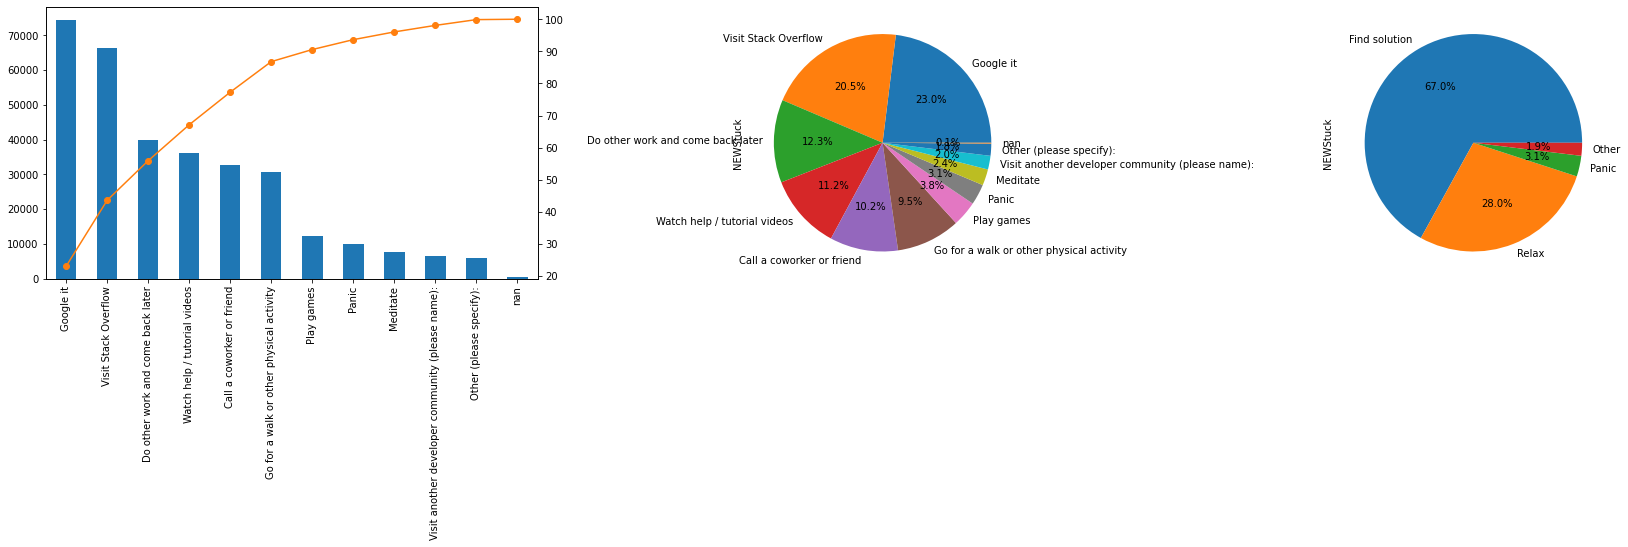

In [9]:
df['NEWStuck'] = df['NEWStuck'].astype('str')
newstuck_cnt = count_action(df, 'NEWStuck')
newstuck_grp_cnt = count_action_category(df, 'NEWStuck', stuck_action_categories)
print(newstuck_cnt)
newstuck_cnt_ratio = (newstuck_cnt / sum(newstuck_cnt)*100)
visualize_cnt(newstuck_cnt, newstuck_grp_cnt)

- **Conclusion:**
  - people often find solution via Google or Stack Overflow
  - Around 70% of survey target try to find solution, and the remain 30% do relax and solve it later.

## 2. What is the language you want to work with most ? (LanguageWantToWorkWith)

By exploring the field "LanguageWantToWorkWith", we can find which programing languages that is loved most.

Due to multiple-values field, so we need to preprocess by extracting it.

In [10]:
feature = "LanguageWantToWorkWith"
print(f"null ratio of {feature} is {df.LanguageHaveWorkedWith.isnull().mean() * 100:.1f} %")

null ratio of LanguageWantToWorkWith is 1.3 %


In [11]:
df.LanguageWantToWorkWith.value_counts()

Python                                                                             1389
Rust                                                                                821
HTML/CSS;JavaScript;Node.js;TypeScript                                              812
C#                                                                                  700
Java                                                                                512
                                                                                   ... 
C#;HTML/CSS;Java;JavaScript;Node.js;Objective-C;PHP;Python;SQL;Swift;TypeScript       1
C#;Elixir;Erlang;HTML/CSS;JavaScript;Python;Ruby;Rust;SQL                             1
C#;Go;JavaScript;Kotlin;Node.js;Python;SQL;Swift;TypeScript                           1
Bash/Shell;C;C++;HTML/CSS;Java;JavaScript;Objective-C;PHP;PowerShell;SQL              1
Elixir;HTML/CSS;Java;JavaScript;Node.js;PHP;SQL;TypeScript                            1
Name: LanguageWantToWorkWith, Le

count    76821.000000
mean         4.739108
std          3.012845
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         38.000000
Name: LanguageWantToWorkWith, dtype: float64


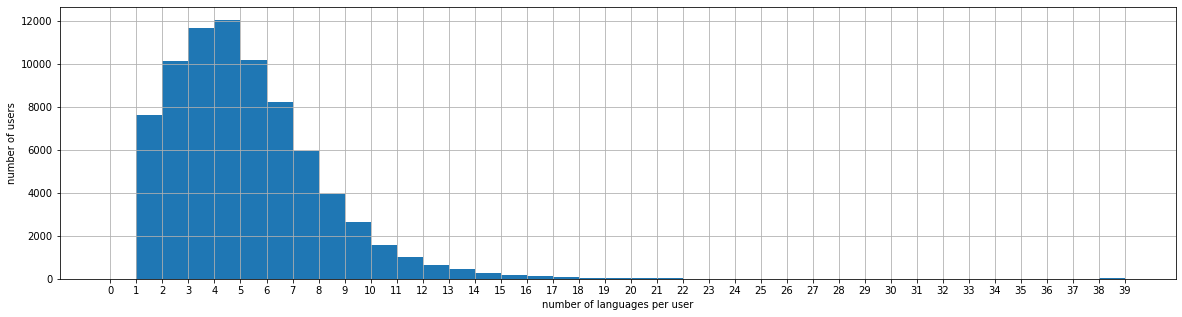

In [12]:
df_lang = df.copy()
df_lang['LanguageWantToWorkWith'] = df_lang['LanguageWantToWorkWith'].astype('str')
df_lang = df_lang[df_lang.LanguageWantToWorkWith!= 'nan']
num_language_per_user = df_lang.LanguageWantToWorkWith.apply(lambda x: len([t for t in x.split(';') if t != '']))
print(num_language_per_user.describe())
fig, ax = plt.subplots(figsize=(20, 5))
bins = np.arange(0,40,1)
ax.hist(num_language_per_user, bins=bins)
ax.set_xticks(bins)
ax.grid()
ax.set_xlabel('number of languages per user')
ax.set_ylabel('number of users')
plt.show()
plt.close()

- As can be seen from the histogram above, almost people (70%) want to work with 6 or less languages. 
- In some special cases, they like more than 15 languages, which is really questionable.

JavaScript     37008
Python         34929
HTML/CSS       29353
TypeScript     26905
SQL            26631
Node.js        24100
C#             17999
Java           17222
Rust           15865
Go             15788
C++            15249
Bash/Shell     14043
Kotlin         10691
C               9702
PHP             8852
Dart            7018
Swift           6353
Ruby            4942
PowerShell      4896
R               4015
Assembly        3578
Haskell         3453
Elixir          3374
Scala           3165
Julia           2445
Clojure         2413
F#              2157
Matlab          1562
LISP            1513
Objective-C     1400
Erlang          1379
Groovy          1177
Perl            1175
VBA             1069
Delphi           975
Crystal          790
APL              568
COBOL            309
Name: LanguageWantToWorkWith, dtype: int64


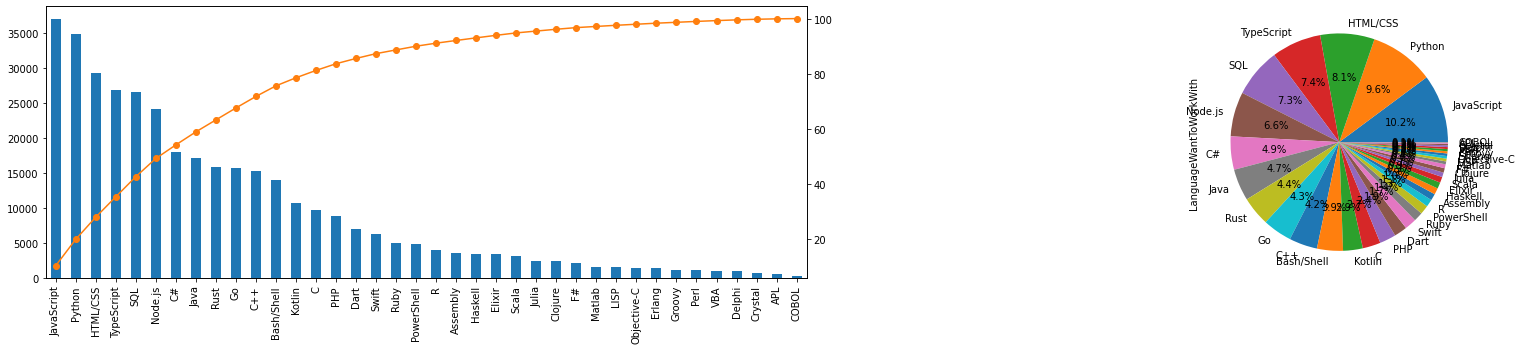

In [13]:
lang_cnt = count_action(df_lang, 'LanguageWantToWorkWith')
print(lang_cnt)
visualize_cnt(lang_cnt)

In [14]:
top_countries = df_lang['Country'].value_counts().head(20).index.to_list()
top_langs = lang_cnt.head(10)

print("Top 10 languages that are wanted to work with most:")
print('\n'.join([f"{idx+1}. {lang}" for idx, lang in enumerate(top_langs.index.to_list())]))
      

Top 10 languages that are wanted to work with most:
1. JavaScript
2. Python
3. HTML/CSS
4. TypeScript
5. SQL
6. Node.js
7. C#
8. Java
9. Rust
10. Go


Furthermore, we can look into the Country to analyze that it is changed by country or it is the global trend.

In [15]:
df_lang_country = df_lang[['Country', 'LanguageWantToWorkWith']]
df_lang_country['LanguageWantToWorkWith'] = df_lang_country['LanguageWantToWorkWith'].apply(lambda x: x.split(';'))
df_lang_country = df_lang_country.explode(['LanguageWantToWorkWith'])
df_lang_country['LanguageWantToWorkWith'] = df_lang_country['LanguageWantToWorkWith'].apply(lambda x: x if x in top_langs else 'other')
df_lang_country = df_lang_country.groupby('Country')['LanguageWantToWorkWith'].value_counts(normalize=True).unstack(fill_value=0).reset_index(drop=False)

C:\Users\DUONGHM\AppData\Local\Temp/ipykernel_2732/3599534116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang_country['LanguageWantToWorkWith'] = df_lang_country['LanguageWantToWorkWith'].apply(lambda x: x.split(';'))


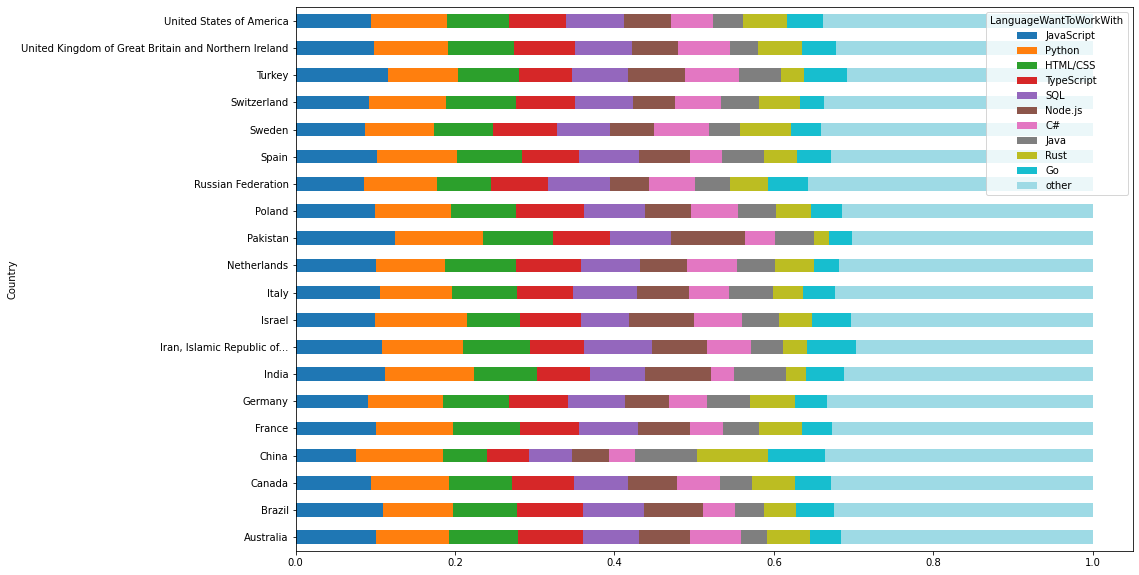

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
df_lang_country[df_lang_country.Country.isin(top_countries)].set_index('Country')[top_langs.index.to_list()+['other']].plot.barh(stacked=True, ax=ax, cmap=cm.tab20)
plt.show()
plt.close()

In top 20 countries, except China, almost countries have same trend about the loving programming language

## 3. What is the best age to start learning coding (to become a professional developer) ?

In [17]:
df.Age1stCode.value_counts()

11 - 17 years           44170
18 - 24 years           20065
5 - 10 years            11720
25 - 34 years            4199
35 - 44 years            1312
Younger than 5 years      905
45 - 54 years             544
55 - 64 years             245
Older than 64 years        83
Name: Age1stCode, dtype: int64

In [18]:
df.Age.value_counts()

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [19]:
df.MainBranch.value_counts()

I am a developer by profession                                                   58153
I am a student who is learning to code                                           12029
I am not primarily a developer, but I write code sometimes as part of my work     6578
I code primarily as a hobby                                                       4929
I used to be a developer by profession, but no longer am                          1237
None of these                                                                      513
Name: MainBranch, dtype: int64

In [20]:
mainbranch_map1 = {
    'I am a developer by profession': 'profession',
    'I am a student who is learning to code': 'student',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'sometimes',
    'I code primarily as a hobby': 'hobby',
    'I used to be a developer by profession, but no longer am': 'ex-dev',
    'None of these': 'None'
}

df_code = df.copy()
df_code['MainBranch_short1'] = df_code.MainBranch.apply(lambda x: mainbranch_map1[x])

age1stcode_map = {
    'Younger than 5 years': '00-05',
    '5 - 10 years': '05-10',
    '11 - 17 years': '11-17',
    '18 - 24 years': '18-24',  
    '25 - 34 years': '25-34',
    '35 - 44 years': '35-44',
    '45 - 54 years': '45-54',
    '55 - 64 years': '55-64',
    'Older than 64 years': '64+'
}

df_code['Age1stCode_short'] = df_code.Age1stCode.apply(lambda x: age1stcode_map.get(x, 'other'))

In [21]:
from statsmodels.graphics.mosaicplot import mosaic

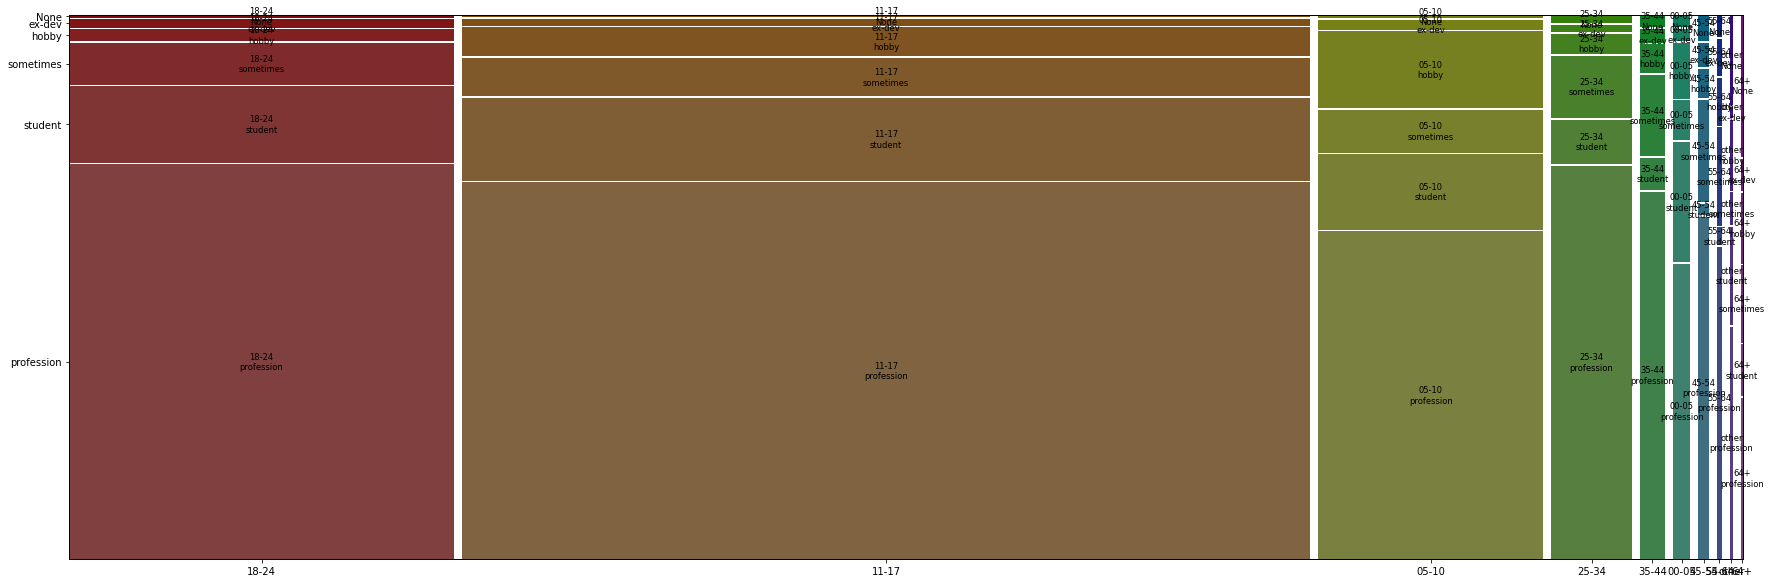

In [22]:
fig, ax = plt.subplots(figsize=(30, 10))
mosaic(df_code, ['Age1stCode_short', 'MainBranch_short1'], ax=ax)
plt.show()
plt.close()

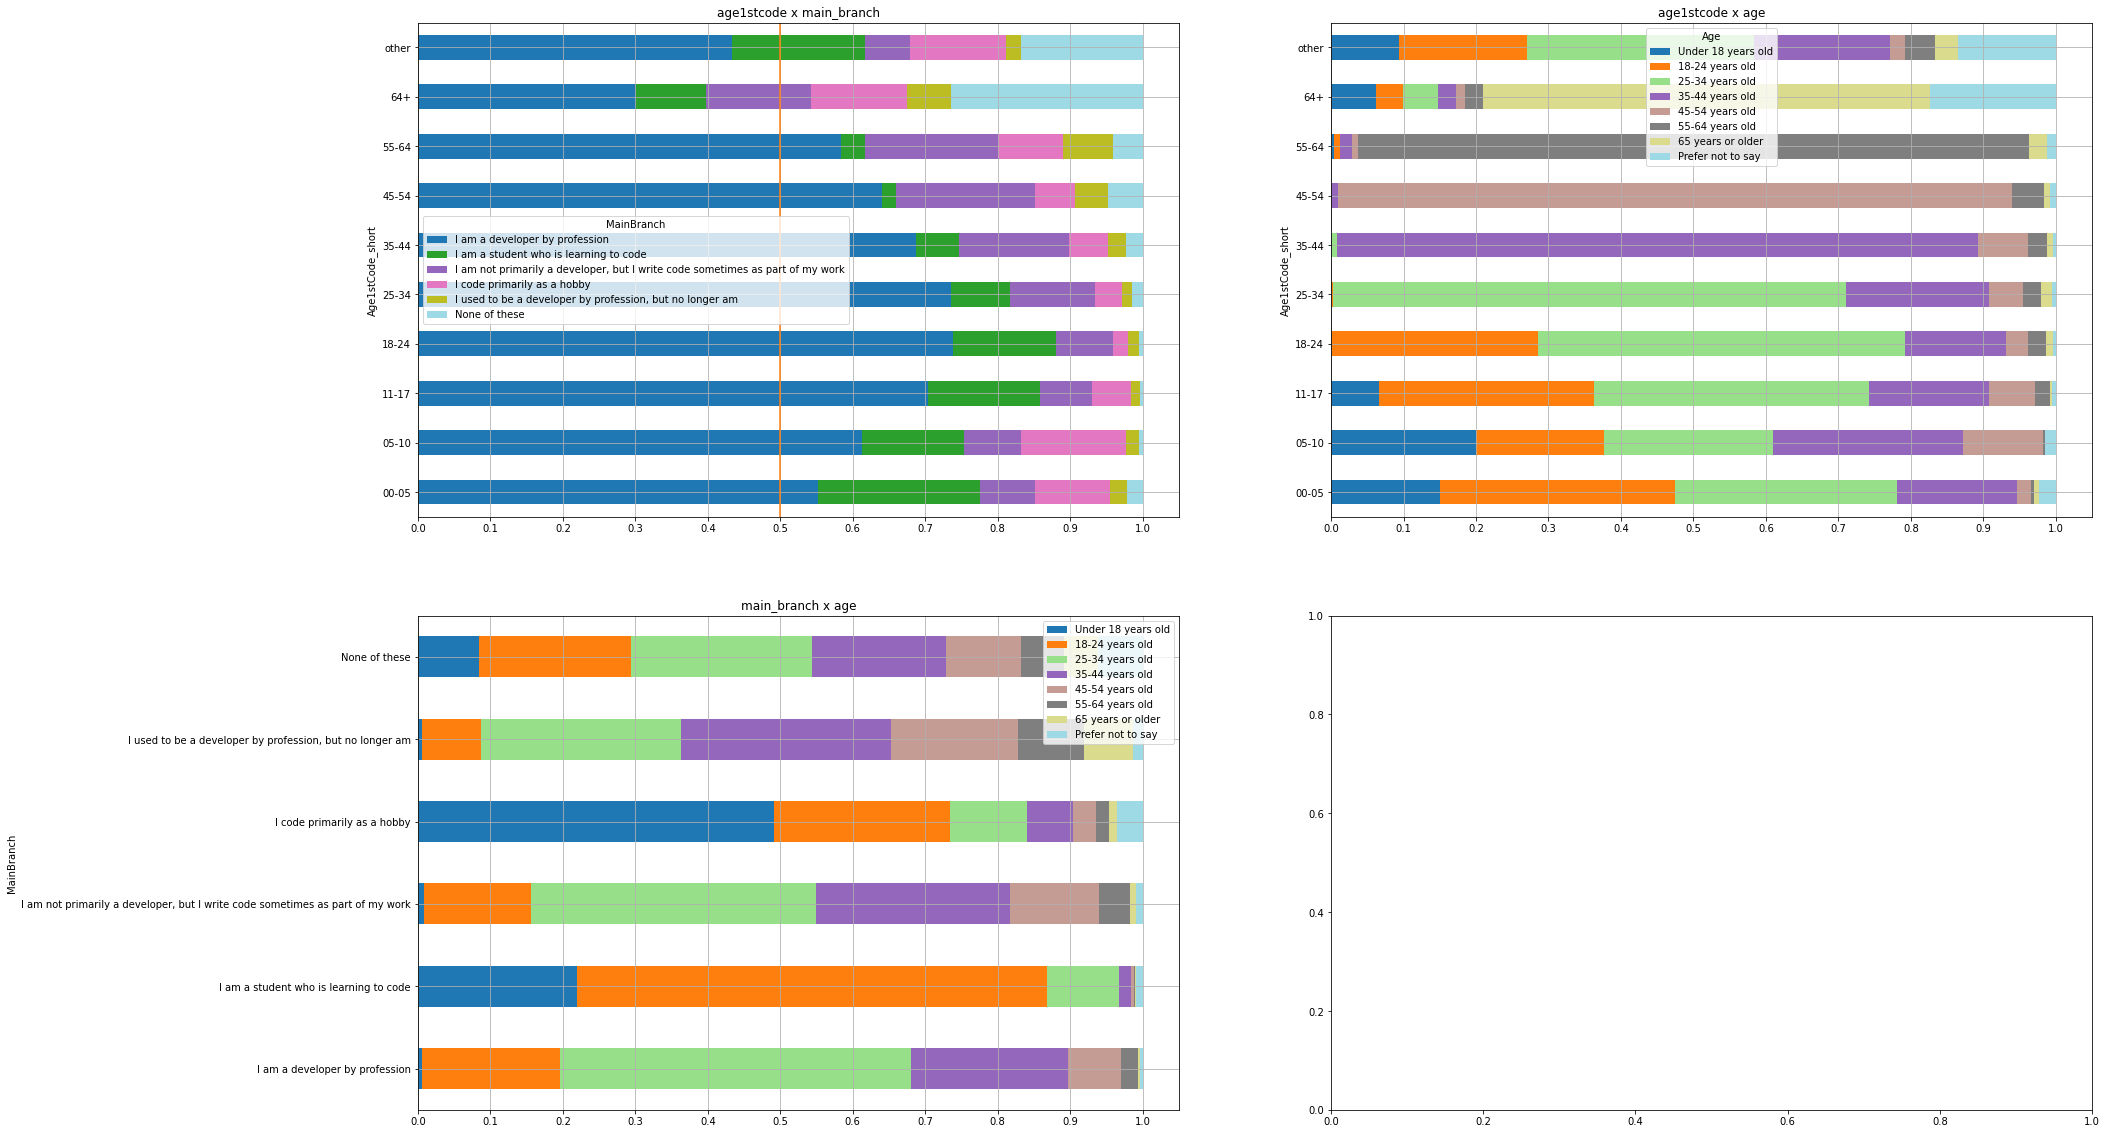

In [23]:
fig, axes = plt.subplots(2,2,figsize=(30, 20))
ax_branch = axes[0][0]
ax_age = axes[0][1]
ax_age_branch = axes[1][0]

branch_order = df_code.MainBranch.value_counts().index.to_list()
df_code_br = df_code.groupby(['Age1stCode_short'])['MainBranch'].value_counts(normalize=True).unstack(fill_value=0)[branch_order]
df_code_br.plot.barh(stacked=True, ax=ax_branch, cmap=cm.tab20)
ax_branch.set_xticks(np.arange(0,1.1,0.1))
ax_branch.axvline(x=0.5, color='tab:orange')
ax_branch.grid()
ax_branch.set_title('age1stcode x main_branch')

age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older", "Prefer not to say"
]
df_code_age = df_code.groupby(['Age1stCode_short'])['Age'].value_counts(normalize=True).unstack(fill_value=0)[age_order]
df_code_age.plot.barh(stacked=True, ax=ax_age, cmap=cm.tab20)
ax_age.set_xticks(np.arange(0,1.1,0.1))
ax_age.grid()
ax_age.set_title('age1stcode x age')

df_age_branch = df_code.groupby(['MainBranch'])['Age'].value_counts(normalize=True).unstack(fill_value=0)[age_order]
df_age_branch.plot.barh(stacked=True, ax=ax_age_branch, cmap=cm.tab20)
ax_age_branch.set_xticks(np.arange(0,1.1,0.1))
ax_age_branch.grid()
ax_age_branch.set_title('main_branch x age')
ax_age_branch.legend(loc=1)

plt.show()
plt.close()

- over 60% of survey subject learned to code when they are from 11 to 24 ages, which means when they are in school, college, university.
- As can be seen in graph "age1stcode x main_branch", the ratio of professional developer nicely increases and reach the peak of 18 - 34 and then decrease after that. 
- The ratio of profession developer in group of early learning people (5-10 years or Younger than 5year) is lower than in group of teenage learning people (11-17 years, 18-24 years), which is really surprise. So is it true that learning to code too early may reduce the rate of becoming professional developer ? To explain this, let's observer age1stcode x age: at the the time they took survey, around 20% of them are under 18 years old and ~40% are below 24 years old. Now, see the "main_branch x age" graph, in professional developer group, the below-24-years-old developer has just around 20%. Therefore, the reason is they are just too young when they took the survey.
- What is the best time to start learning coding ? Due to data above, the best time is from 11 years old to 34 years old. And the second best time is now. Even 64 years old, there are 30% of them are professional developer. So, why not start today ?